In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Read data
df = pd.read_excel("/Users/guoyixuan/Documents/pythoncode/ccwmachine/wine.xlsx")

# Data preprocessing
df.head()

result = []

首先觀察變數之間的相關性：

從heatmap可以看出，叫淺色的區塊比較少，變數之間的關聯性可能沒有很大
可以預期做主成分分析分類效果並不會改進很多

<Axes: >

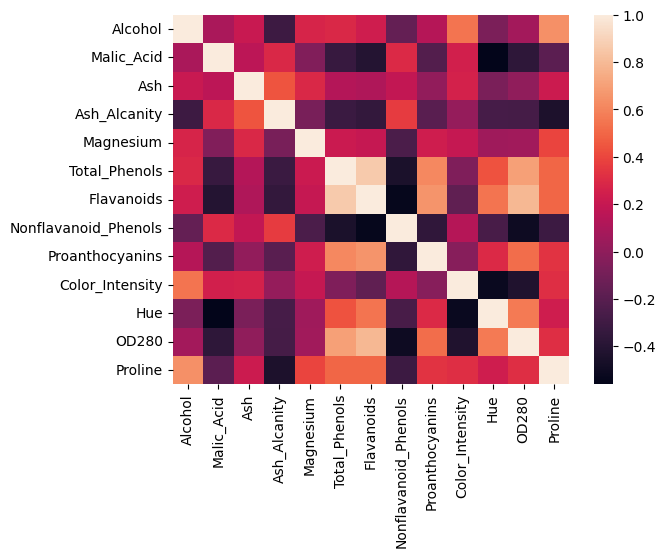

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df_plot = df.drop(['Customer_Segment'], axis=1)
sns.heatmap(df_plot.corr(), annot = False)

接著：
準備 original data, standardized data, standardized+pca data 的訓練資料與測試資料


In [3]:
# Original data
X = np.array(df.iloc[:, :-1])  #排除最後一欄分類標籤 N x p 
#178 13
y = np.array(df.iloc[:, -1])
#178 1

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#142 13  #36 13  #142 1  #36 1

# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

先利用原始資料 X_train, X_test 進行三種分類器的比較：
1. original ＋ Logistic Regression
2. original ＋ SVM
3. original ＋ Neural network

首先先進行 original + logistics regression 分類器的設置

1. 原始資料 ＋ Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = 1)
solver = "lbfgs" # ’lbfgs’ is the default

clf_original = LogisticRegression(solver = solver, **opts)
clf_original.fit(X_train, y_train)
y_pred = clf_original.predict(X_test) #predict class labels for samples in X_test

ori_logis = round(accuracy_score(y_test, y_pred))
#print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56003D+02    |proj g|=  1.57983D+04

At iterate   50    f=  3.14521D+01    |proj g|=  2.23945D+02

At iterate  100    f=  1.75533D+01    |proj g|=  1.65163D+01

At iterate  150    f=  1.48682D+01    |proj g|=  3.45810D+01

At iterate  200    f=  1.43805D+01    |proj g|=  5.34666D+01

At iterate  250    f=  1.40293D+01    |proj g|=  3.40902D+01

At iterate  300    f=  1.39066D+01    |proj g|=  9.11680D+00

At iterate  350    f=  1.36649D+01    |proj g|=  8.59548D+00

At iterate  400    f=  1.34494D+01    |proj g|=  2.60711D+00

At iterate  450    f=  1.33968D+01    |proj g|=  6.02012D+00

At iterate  500    f=  1.33724D+01    |proj g|=  3.89756D+00

At iterate  550    f=  1.33667D+01    |proj g|=  7.67451D+00

At iterate  600    f=  1.33517D+01    |proj g|=  2.72670D+01

At iterate  650    f=  1.3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


根據上面的試驗可以看出，原始資料+logistic的準確度可以達到100%

2. 原始資料 ＋ SVM

* 觀察改變 kernal 的變化
* 觀察使用 SVC 與 LinearSVC 的變化

首先觀察改變kernal的變化，我們會使用三種參數，"poly","linear","rbf"來建立分類器觀察準確度

In [34]:
from sklearn.svm import SVC, LinearSVC
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)

clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print("kernal 設為 poly 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
ori_svm_poly = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="linear", **opts)

clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print("kernal 設為 linear 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
ori_svm_linear = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 5 # SVM regularization parameter
opts = dict(C = C, decision_function_shape = "ovo", tol = 1e-6, max_iter = 100000)
clf_svm = SVC(kernel="rbf", gamma="auto", **opts)

clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print("kernal 設為 rbf 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
ori_svm_rbf = round(accuracy_score(y_test, predictions), 2)


kernal 設為 poly 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.83      0.91        12
           3       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

kernal 設為 linear 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91        12
           3       0.83      0.91      0.87        11

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36

kernal 設為 rbf 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      0.08      0.14        13
           2       0.35      1.00      0.

/Users/guoyixuan/Documents/pythoncode/ccwML/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/guoyixuan/Documents/pythoncode/ccwML/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


利用SVC建立模型完之後，嘗試利用LinearSVC來建立svm模型來觀察其準確度

In [14]:
C = 1
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6), dual = False)
clf_svm = LinearSVC(**opts) # one vs the rest

clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test)
print("利用 LinearSVC 函數的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
ori_svm_tsvc = round(accuracy_score(y_test, predictions), 2)

利用 LinearSVC 函數的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.75      0.86        12
           3       0.85      1.00      0.92        11

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.91        36
weighted avg       0.93      0.92      0.91        36



＊ 根據上面的試驗可以看到，kernal 設為 ploy 或 linear 的準確度差不多，都能達到 97% 左右
＊ kernal 設為rbf的話準確度則會非常低，只有 58% 左右，gamma 也必須調到 0.0001
＊ 另外，比起使用 SVC，LinearSVC 的準確度比較低，只有 94% 左右

3. 原始資料 ＋ Neural network

* 觀察激發函數設為logistic跟relu下準確度的變化
* 觀察改變solver的準確度變化

使用激發函數 "logistic" 進行 neural network

Iteration 1, loss = 1.10614827
Iteration 2, loss = 1.09437834
Iteration 3, loss = 1.08369321
Iteration 4, loss = 1.07444036
Iteration 5, loss = 1.06639299
Iteration 6, loss = 1.05938740
Iteration 7, loss = 1.05297178
Iteration 8, loss = 1.04695199
Iteration 9, loss = 1.04152236
Iteration 10, loss = 1.03709492
Iteration 11, loss = 1.03410007
Iteration 12, loss = 1.03249603
Iteration 13, loss = 1.03158273
Iteration 14, loss = 1.03050539
Iteration 15, loss = 1.02884091
Iteration 16, loss = 1.02655800
Iteration 17, loss = 1.02381830
Iteration 18, loss = 1.02085367
Iteration 19, loss = 1.01788124
Iteration 20, loss = 1.01503136
Iteration 21, loss = 1.01231629
Iteration 22, loss = 1.00960338
Iteration 23, loss = 1.00660638
Iteration 24, loss = 1.00297560
Iteration 25, loss = 0.99844536
Iteration 26, loss = 0.99298891
Iteration 27, loss = 0.98690675
Iteration 28, loss = 0.98065631
Iteration 29, loss = 0.97465527
Iteration 30, loss = 0.96924326
Iteration 31, loss = 0.96458905
Iteration 32, los

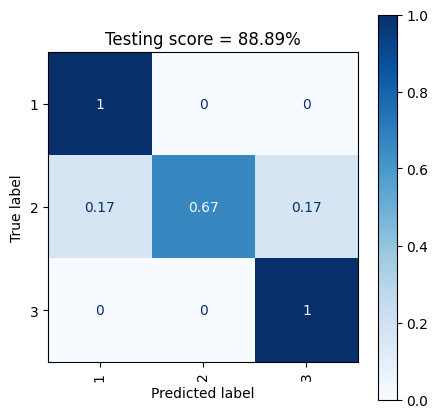

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

hidden_layers = (30, ) # one hidden layer #output decide by model #30個神經元
activation = "logistic"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)

#print(classification_report(y_test, predictions))
#fig, ax = plt.subplots(figsize = (5, 5))
#plt.plot(clf_MLP.loss_curve_)
#plt.grid(True)
#plt.title("Loss Curve")
#plt.xlabel("Iteration")
#plt.ylabel("Loss")
#plt.figure(figsize = (8, 8))
#plt.show()

fig, ax = plt.subplots(figsize = (5, 5))
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(X_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    X_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

print("激發函數設為 logistic, 隱藏層神經元數量為 30 個的 MLP 模型預測準確率")
disp.ax_.set_title(title)
plt.show()
ori_neu_logis = round(accuracy_score(y_test, predictions), 2)

接著使用激發函數 “relu” 來進行 neural network

首先會先利用迴圈找到準確度最高的隱藏層數

In [8]:
activation = "relu" # the default
solver = "adam"
accura = np.zeros(len(np.arange(30, 500, 30)))
hidden = np.arange(30, 500, 30)
index = np.arange(0, 16, 1)

for i in index:
    hidden_layers = (hidden[i], ) 
    opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, activation = activation, 
                tol = 1e-6, max_iter = int(1e6))
    clf_MLP = MLPClassifier(solver = solver, **opts)
    clf_MLP.fit(X_train, y_train)
    predictions = clf_MLP.predict(X_test)
    accura[i] = round(accuracy_score(y_test, predictions), 2)

print(hidden)
print(accura)

Iteration 1, loss = 21.06777765
Iteration 2, loss = 21.06777764
Iteration 3, loss = 21.06777762
Iteration 4, loss = 21.06777761
Iteration 5, loss = 21.06777759
Iteration 6, loss = 21.06777758
Iteration 7, loss = 21.06777761
Iteration 8, loss = 21.06777840
Iteration 9, loss = 21.06779087
Iteration 10, loss = 21.06799306
Iteration 11, loss = 21.07126955
Iteration 12, loss = 21.10542675
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 18.75922274
Iteration 2, loss = 16.75408673
Iteration 3, loss = 14.64377259
Iteration 4, loss = 12.88199399
Iteration 5, loss = 13.28469930
Iteration 6, loss = 14.73327472
Iteration 7, loss = 15.06182070
Iteration 8, loss = 13.61041907
Iteration 9, loss = 9.09067406
Iteration 10, loss = 4.08736235
Iteration 11, loss = 4.92353487
Iteration 12, loss = 7.71618615
Iteration 13, loss = 9.38219112
Iteration 14, loss = 10.10987340
Iteration 15, loss = 10.05694574
Iteration 16, loss = 9.34379674
Iteration 

故根據下圖，針對激發函數 “relu”，設定隱藏層為 200 來建立 neural network

Text(0, 0.5, 'Accuracy')

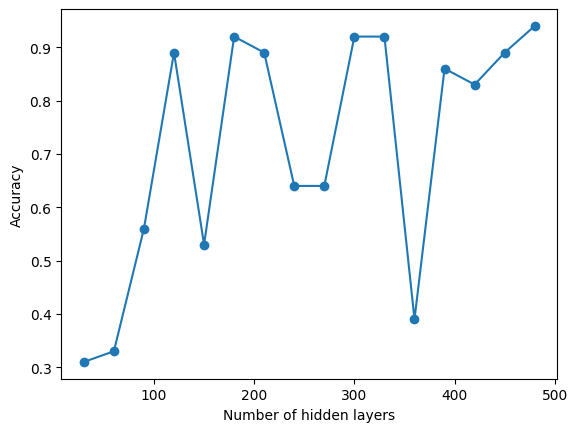

In [9]:
plt.plot(hidden, accura, "o-")
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")

Iteration 1, loss = 21.06777993
Iteration 2, loss = 21.05062977
Iteration 3, loss = 19.39641520
Iteration 4, loss = 14.19216164
Iteration 5, loss = 14.75491882
Iteration 6, loss = 17.14637444
Iteration 7, loss = 17.57325681
Iteration 8, loss = 13.94076906
Iteration 9, loss = 7.80599503
Iteration 10, loss = 13.80535269
Iteration 11, loss = 17.35725441
Iteration 12, loss = 18.68591166
Iteration 13, loss = 18.34689410
Iteration 14, loss = 16.89808463
Iteration 15, loss = 14.40341815
Iteration 16, loss = 10.83411040
Iteration 17, loss = 6.61901812
Iteration 18, loss = 9.35569892
Iteration 19, loss = 11.92797658
Iteration 20, loss = 11.82659884
Iteration 21, loss = 9.49700032
Iteration 22, loss = 5.29333029
Iteration 23, loss = 1.98319698
Iteration 24, loss = 2.67773696
Iteration 25, loss = 3.89890925
Iteration 26, loss = 5.41367222
Iteration 27, loss = 5.88571665
Iteration 28, loss = 5.81680748
Iteration 29, loss = 5.98443639
Iteration 30, loss = 5.09181029
Iteration 31, loss = 4.35785913


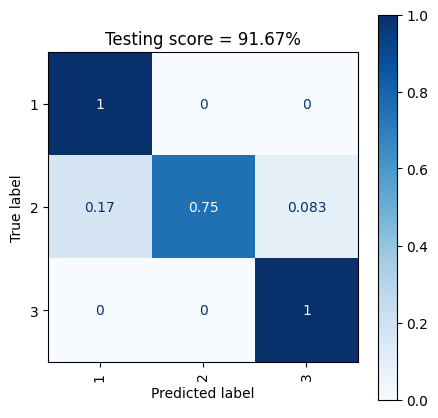

In [11]:
activation = "relu" # the default
hidden_layers = (300, ) # one hidden layer
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test)

print("{}%".format(round(accuracy_score(y_test, predictions)*100, 2)))

fig, ax = plt.subplots(figsize = (5, 5))
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(X_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    X_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")
disp.ax_.set_title(title)
plt.show()

ori_neu_relu = round(accuracy_score(y_test, predictions), 2)

根據上面的試驗可以看到，設定激發函數“logistic"只需要設定隱藏層30準確度就可以達到94%
激發函數“relu"則需要設定隱藏層300才能使準確度達到92%

再利用標準化資料 X_train, X_test 進行三種分類器的比較：
4. standardized ＋ Logistic Regression
5. standardized ＋ SVM
6. standardized ＋ Neural network
首先利用 standardized + logistic regression 來建立模型

4. standardized ＋ Logistic Regression

In [12]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose = 1)
solver = "lbfgs" # ’lbfgs’ is the default

clf_original = LogisticRegression(solver = solver, **opts)
clf_original.fit(X_train_, y_train)
y_pred = clf_original.predict(X_test_) #predict class labels for samples in X_test

print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(classification_report(y_test, y_pred))
##原始資料利用邏輯斯回歸分類器的測試資料預測準確率為%

stand_logis = round(accuracy_score(y_test, y_pred), 2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56003D+02    |proj g|=  5.39374D+01
100.00%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


5. standardized ＋ SVM

In [13]:
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)

clf_svm.fit(X_train_, y_train)
predictions = clf_svm.predict(X_test_)
print("kernal 設為 poly 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
stand_svm_poly = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="linear", **opts)

clf_svm.fit(X_train_, y_train)
predictions = clf_svm.predict(X_test_)
print("kernal 設為 linear 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
stand_svm_linear = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 1 # SVM regularization parameter
opts = dict(C = C, decision_function_shape = "ovo", tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="rbf", gamma="auto", **opts)

clf_svm.fit(X_train_, y_train)
predictions = clf_svm.predict(X_test_)
print("kernal 設為 rbf 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
stand_svm_rbf = round(accuracy_score(y_test, predictions), 2)

kernal 設為 poly 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92        12
           3       1.00      0.91      0.95        11

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36

kernal 設為 linear 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.92      0.92      0.92        12
           3       0.91      0.91      0.91        11

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36

kernal 設為 rbf 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.

用完SVC後，同樣嘗試使用LinearSVC來建立svm模型

In [15]:
C = 1
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6), dual = False)
clf_svm = LinearSVC(**opts) # one vs the rest

clf_svm.fit(X_train_, y_train)
predictions = clf_svm.predict(X_test_)
print("利用 LinearSVC 函數的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
stand_svm_tsvc = round(accuracy_score(y_test, predictions), 2)

利用 LinearSVC 函數的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



6. standardized ＋ Neural network

一樣使用兩種參數設定，激活函數"logistic"跟"relu"
首先使用激活函數"logistic"

Iteration 1, loss = 1.17575713
Iteration 2, loss = 1.16498298
Iteration 3, loss = 1.15447995
Iteration 4, loss = 1.14424428
Iteration 5, loss = 1.13427647
Iteration 6, loss = 1.12457844
Iteration 7, loss = 1.11515143
Iteration 8, loss = 1.10599543
Iteration 9, loss = 1.09710911
Iteration 10, loss = 1.08848986
Iteration 11, loss = 1.08013396
Iteration 12, loss = 1.07203689
Iteration 13, loss = 1.06419332
Iteration 14, loss = 1.05659725
Iteration 15, loss = 1.04924191
Iteration 16, loss = 1.04211980
Iteration 17, loss = 1.03522271
Iteration 18, loss = 1.02854172
Iteration 19, loss = 1.02206734
Iteration 20, loss = 1.01578953
Iteration 21, loss = 1.00969783
Iteration 22, loss = 1.00378142
Iteration 23, loss = 0.99802920
Iteration 24, loss = 0.99242992
Iteration 25, loss = 0.98697223
Iteration 26, loss = 0.98164479
Iteration 27, loss = 0.97643636
Iteration 28, loss = 0.97133587
Iteration 29, loss = 0.96633252
Iteration 30, loss = 0.96141585
Iteration 31, loss = 0.95657581
Iteration 32, los

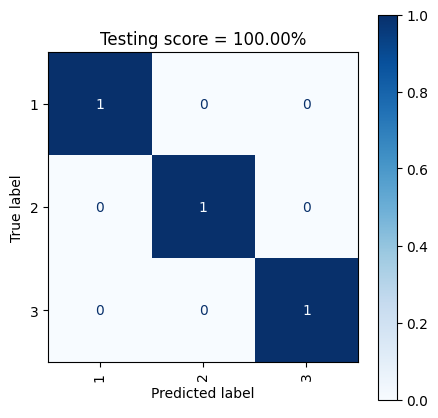

In [16]:
hidden_layers = (30, ) # one hidden layer #output decide by model #30個神經元
activation = "logistic"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train_, y_train)
predictions = clf_MLP.predict(X_test_)

fig, ax = plt.subplots(figsize = (5, 5))
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(X_test_, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    X_test_, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

print("激發函數設為 logistic, 隱藏層神經元數量為 30 個的 MLP 模型預測準確率")
disp.ax_.set_title(title)
plt.show()
stand_neu_logis = round(accuracy_score(y_test, predictions), 2)

接著使用激活函數"relu"

Iteration 1, loss = 1.17211216
Iteration 2, loss = 1.11124349
Iteration 3, loss = 1.05284396
Iteration 4, loss = 0.99696339
Iteration 5, loss = 0.94367565
Iteration 6, loss = 0.89296632
Iteration 7, loss = 0.84477226
Iteration 8, loss = 0.79904008
Iteration 9, loss = 0.75573884
Iteration 10, loss = 0.71482189
Iteration 11, loss = 0.67618857
Iteration 12, loss = 0.63978254
Iteration 13, loss = 0.60547572
Iteration 14, loss = 0.57318640
Iteration 15, loss = 0.54282145
Iteration 16, loss = 0.51425359
Iteration 17, loss = 0.48743350
Iteration 18, loss = 0.46227954
Iteration 19, loss = 0.43867530
Iteration 20, loss = 0.41653157
Iteration 21, loss = 0.39574641
Iteration 22, loss = 0.37625585
Iteration 23, loss = 0.35799837
Iteration 24, loss = 0.34087429
Iteration 25, loss = 0.32481365
Iteration 26, loss = 0.30975151
Iteration 27, loss = 0.29562520
Iteration 28, loss = 0.28238863
Iteration 29, loss = 0.26995986
Iteration 30, loss = 0.25829226
Iteration 31, loss = 0.24733082
Iteration 32, los

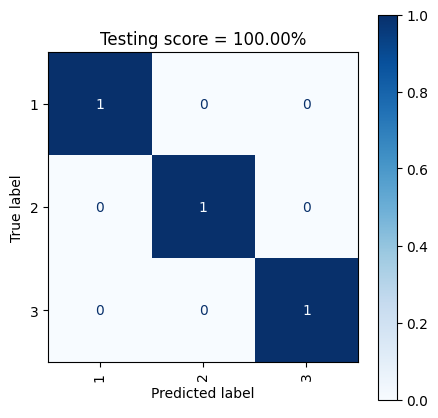

In [17]:
hidden_layers = (200, ) # one hidden layer #output decide by model #30個神經元
activation = "relu"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train_, y_train)
predictions = clf_MLP.predict(X_test_)

fig, ax = plt.subplots(figsize = (5, 5))
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(X_test_, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    X_test_, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

print("激發函數設為 logistic, 隱藏層神經元數量為 30 個的 MLP 模型預測準確率")
disp.ax_.set_title(title)
plt.show()
stand_neu_relu = round(accuracy_score(y_test, predictions), 2)

最後利用主成分＋標準化資料 X_train, X_test 進行三種分類器的比較：

7. pca＋standardized ＋ Logistic Regression
8. pca＋standardized ＋ SVM
9. pca＋standardized ＋ Neural network
並觀察不同主成分設定下準確度的變化

7. 主成分＋標準化資料 ＋ Logistic Regression

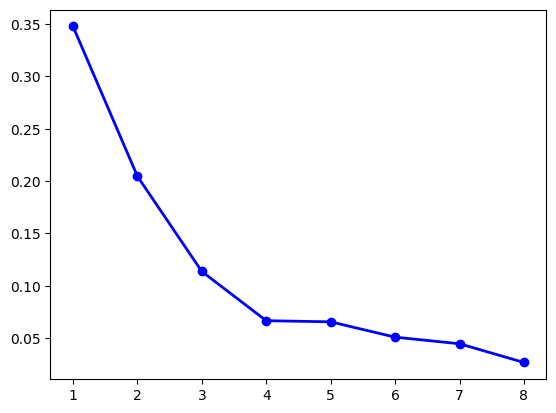

In [25]:
# PCA and Standardized data
# 繪製 scree plot
from sklearn.decomposition import PCA
pca = PCA(n_components = 8).fit(X_train_)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

# 根據 scree plot，選擇使用4個主成分
pca = PCA(n_components = 4).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)

In [26]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = "lbfgs" 
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)

print(classification_report(y_test, y_pred))
pca_logis = round(accuracy_score(y_test, y_pred), 2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56003D+02    |proj g|=  1.02959D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     21     22      1     0     0   4.135D-04   1.819D+01
  F =   18.185356298215041     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


8. pca＋standardized ＋ SVM

In [27]:
from sklearn.svm import SVC, LinearSVC
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, tol = 1e−6, max_iter = int(1e6))
clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)

clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print("kernal 設為 poly 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
pca_svm_poly = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="linear", **opts)

clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print("kernal 設為 linear 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
pca_svm_linear = round(accuracy_score(y_test, predictions), 2)

# -------------------------------------------------------------
C = 1 # SVM regularization parameter
opts = dict(C = C, decision_function_shape = "ovo", tol = 1e-6, max_iter = int(1e6))
clf_svm = SVC(kernel="rbf", gamma="auto", **opts)

clf_svm.fit(Z_train, y_train)
predictions = clf_svm.predict(Z_test)
print("kernal 設為 rbf 的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
pca_svm_rbf = round(accuracy_score(y_test, predictions), 2)

kernal 設為 poly 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       0.92      1.00      0.96        12
           3       1.00      0.73      0.84        11

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.91        36
weighted avg       0.93      0.92      0.91        36

kernal 設為 linear 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

kernal 設為 rbf 的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.

LinearSVC

In [28]:
C = 1
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6), dual = False)
clf_svm = LinearSVC(**opts) # one vs the rest

clf_svm.fit(X_train_, y_train)
predictions = clf_svm.predict(X_test_)
print("利用 LinearSVC 函數的 svm 模型預測準確率")
print(classification_report(y_test, predictions))
pca_svm_tsvc = round(accuracy_score(y_test, predictions), 2)

利用 LinearSVC 函數的 svm 模型預測準確率
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



9. pca＋standardized ＋ Neural network

Iteration 1, loss = 1.31623135
Iteration 2, loss = 1.30567094
Iteration 3, loss = 1.29526177
Iteration 4, loss = 1.28500775
Iteration 5, loss = 1.27491241
Iteration 6, loss = 1.26497873
Iteration 7, loss = 1.25520912
Iteration 8, loss = 1.24560552
Iteration 9, loss = 1.23616978
Iteration 10, loss = 1.22690382
Iteration 11, loss = 1.21780963
Iteration 12, loss = 1.20888916
Iteration 13, loss = 1.20014424
Iteration 14, loss = 1.19157654
Iteration 15, loss = 1.18318755
Iteration 16, loss = 1.17497856
Iteration 17, loss = 1.16695061
Iteration 18, loss = 1.15910452
Iteration 19, loss = 1.15144082
Iteration 20, loss = 1.14395976
Iteration 21, loss = 1.13666127
Iteration 22, loss = 1.12954498
Iteration 23, loss = 1.12261017
Iteration 24, loss = 1.11585580
Iteration 25, loss = 1.10928048
Iteration 26, loss = 1.10288249
Iteration 27, loss = 1.09665976
Iteration 28, loss = 1.09060989
Iteration 29, loss = 1.08473016
Iteration 30, loss = 1.07901751
Iteration 31, loss = 1.07346860
Iteration 32, los

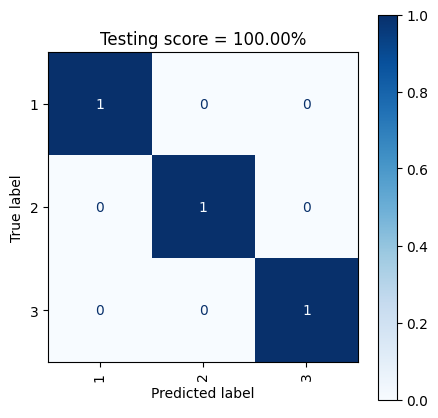

In [22]:
hidden_layers = (30, ) # one hidden layer #output decide by model #30個神經元
activation = "logistic"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train, y_train)
predictions = clf_MLP.predict(Z_test)

fig, ax = plt.subplots(figsize = (5, 5))
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(Z_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    Z_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

print("激發函數設為 logistic, 隱藏層神經元數量為 30 個的 MLP 模型預測準確率")
disp.ax_.set_title(title)
plt.show()
pca_neu_logis = round(accuracy_score(y_test, predictions), 2)

Iteration 1, loss = 1.19066268
Iteration 2, loss = 1.18341339
Iteration 3, loss = 1.17642890
Iteration 4, loss = 1.16970515
Iteration 5, loss = 1.16323717
Iteration 6, loss = 1.15701937
Iteration 7, loss = 1.15104502
Iteration 8, loss = 1.14530632
Iteration 9, loss = 1.13979485
Iteration 10, loss = 1.13450200
Iteration 11, loss = 1.12941932
Iteration 12, loss = 1.12453830
Iteration 13, loss = 1.11985008
Iteration 14, loss = 1.11534523
Iteration 15, loss = 1.11101369
Iteration 16, loss = 1.10684492
Iteration 17, loss = 1.10282800
Iteration 18, loss = 1.09895182
Iteration 19, loss = 1.09520527
Iteration 20, loss = 1.09157738
Iteration 21, loss = 1.08805751
Iteration 22, loss = 1.08463552
Iteration 23, loss = 1.08130184
Iteration 24, loss = 1.07804755
Iteration 25, loss = 1.07486448
Iteration 26, loss = 1.07174513
Iteration 27, loss = 1.06868273
Iteration 28, loss = 1.06567113
Iteration 29, loss = 1.06270476
Iteration 30, loss = 1.05977862
Iteration 31, loss = 1.05688815
Iteration 32, los

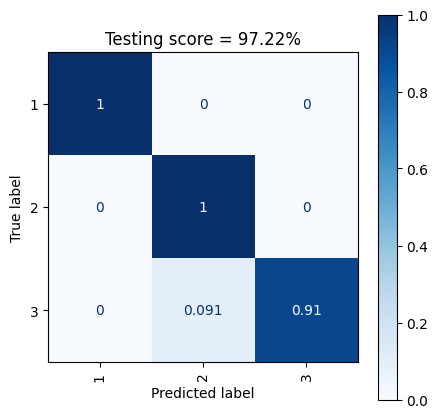

In [23]:
hidden_layers = (30, ) # one hidden layer #output decide by model #30個神經元
activation = "logistic"
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, \
activation = activation, tol = 1e-6, max_iter = int(1e6))
solver = "adam" # default solver

clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(Z_train, y_train)
predictions = clf_MLP.predict(Z_test)

fig, ax = plt.subplots(figsize = (5, 5))
title = "Testing score = {:.2f}%".format(100*clf_MLP.score(Z_test, y_test))
disp = ConfusionMatrixDisplay.from_estimator(
    clf_MLP, 
    Z_test, 
    y_test, 
    xticks_rotation = "vertical",
    #display labels
    ax = ax, 
    cmap = plt.cm.Blues,
    normalize = "true")

print("激發函數設為 logistic, 隱藏層神經元數量為 30 個的 MLP 模型預測準確率")
disp.ax_.set_title(title)
plt.show()
pca_neu_relu = round(accuracy_score(y_test, predictions), 2)

In [30]:
result = []
result.append((ori_logis, ori_svm_linear, ori_svm_poly, ori_svm_rbf, ori_svm_tsvc, ori_neu_logis, ori_neu_relu))
result.append((stand_logis, stand_svm_poly, stand_svm_linear, stand_svm_rbf, stand_svm_tsvc, stand_neu_logis, stand_neu_relu))
result.append((pca_logis, pca_svm_poly, pca_svm_linear, pca_svm_rbf, pca_svm_tsvc, pca_neu_logis, pca_neu_relu))

results = pd.DataFrame(result, columns = ["Logistic", "SVM_poly", "SVM_linear", "SVM_rbf", "LinearSVC", "MLP_logistic", "MLP_relu"],
                       index = ["original", "standard", "standard+PCA"])

print(results)

              Logistic  SVM_poly  SVM_linear  SVM_rbf  LinearSVC  \
original           1.0      0.92        0.94     0.36       0.92   
standard           1.0      0.94        0.94     1.00       1.00   
standard+PCA       1.0      0.92        1.00     1.00       1.00   

              MLP_logistic  MLP_relu  
original              0.89      0.92  
standard              1.00      1.00  
standard+PCA          1.00      0.97  


根據以上之結果我們可以觀察三種資料在不同分類器設定下的準確度

* 可以看到其中 svm 模型設定"rbf"參數的準確度在原始資料只有39%
* 標準化後的資料則無論在哪種分類器的不同參數設定下準確度都很好
* 可以看到 neural network 參數設定 "logistic" 跟 logistic regression 模型的表現似乎最穩定，準確度相對較高。